In [1]:
import sys
sys.path.append('scripts')
from Retrosynthesis import init_LocalRetro, retrosnythesis
import torch

Using backend: pytorch
/home/shuanchen/anaconda3/envs/rdenv/lib/python3.6/site-packages/dgl/base.py:45: DGLWarning: Detected an old version of PyTorch. Suggest using torch>=1.5.0 for the best experience.
  return warnings.warn(message, category=category, stacklevel=1)


In [2]:
'''
Preatrained model can be found in github release:
https://github.com/kaist-amsg/LocalRetro/releases/tag/data

Load the model and necessary files for prediction decoding
'''
dataset = 'USPTO_MIT'
device = torch.device('cuda:0')
model_path = 'models/%s.pth' % dataset
config_path = 'data/configs/default_config.json'
data_dir = 'data/%s' % dataset

args = {'data_dir': data_dir, 'model_path': model_path, 'config_path': config_path, 'device': device, 'mode': 'test', 'GRA': True}
model, graph_function, atom_templates, bond_templates, smarts2E, smarts2H = init_LocalRetro(args)

Parameters of loaded LocalRetro model:
{'attention_heads': 8, 'attention_layers': 1, 'batch_size': 16, 'edge_hidden_feats': 64, 'node_out_feats': 320, 'num_step_message_passing': 6, 'AtomTemplate_n': 116, 'BondTemplate_n': 620, 'in_node_feats': 27, 'in_edge_feats': 13, 'GRA': True}


In [3]:
target_smiles = {'Lenalidomide': 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N',
                 'Salmeterol': 'OCc1cc(ccc1O)[C@H](O)CNCCCCCCOCCCCc2ccccc2',
                 '5-HT6 receptor ligand': 'O=S(=O)(Nc4cc2CCC1(CCC1)Oc2c(N3CCNCC3)c4)c5ccccc5F', 
                 'DDR1_037': 'O=C(Nc4cccc(C(=O)N3CCN(c1ccnc2[nH]ccc12)C3)c4)c5cccc(C(F)(F)F)c5',
                 'DDR1_032': 'Cc3cc2[nH]c(c1cc(CN(C)C)cc(C(F)(F)F)c1)nc2cc3C#Cc4cncnc4'}

In [3]:
top_k = 10
smiles = 'O=C1NC(=O)CCC1N3C(=O)c2cccc(c2C3)N'
results = retrosnythesis(smiles, model, graph_function, device, atom_templates, bond_templates, smarts2E, smarts2H, top_k = top_k)

,SMILES,Local reaction template,Score,Molecule
0,ClC1=C(SC2=C([N+]([O-])=O)C=C(C(NC3=CC=CC4=C3C...,None,NaN,
1,Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c...,"[C;+0:1]-[N;+0:2]>>O-[C;+0:1].[N;+0:2] at [11,...",0.524450,
2,Nc1cccc2cnccc12.O=C(Cl)c1cc([N+](=O)[O-])c(Sc2...,[C;+0:1]-[N;+0:2]>>Cl-[C;+0:1].[N;+0:2] at [11...,0.385055,
3,O=C(Nc1cccc2cnccc12)c1cc([N+](=O)[O-])c(Br)s1....,"[c;+0:1]-[S;+0:2]>>Br-[c;+0:1].[S;+0:2] at [4, 3]",0.060782,
4,O=C(Nc1cccc2cnccc12)c1cc([N+](=O)[O-])c(Cl)s1....,"[c;+0:1]-[S;+0:2]>>Cl-[c;+0:1].[S;+0:2] at [4, 3]",0.016334,
5,Clc1cncc(Cl)c1Br.O=C(Nc1cccc2cnccc12)c1cc([N+]...,"[c;+0:1]-[S;+0:2]>>Br-[c;+0:1].[S;+0:2] at [2, 3]",0.009842,
6,Clc1cncc(Cl)c1Cl.O=C(Nc1cccc2cnccc12)c1cc([N+]...,"[c;+0:1]-[S;+0:2]>>Cl-[c;+0:1].[S;+0:2] at [2, 3]",0.008658,
7,COC(=O)c1cc([N+](=O)[O-])c(Sc2c(Cl)cncc2Cl)s1....,[C;+0:1]-[N;+0:2]>>C-O-[C;+0:1].[N;+0:2] at [1...,0.005076,
8,CCOC(=O)c1cc([N+](=O)[O-])c(Sc2c(Cl)cncc2Cl)s1...,[C;+0:1]-[N;+0:2]>>C-C-O-[C;+0:1].[N;+0:2] at ...,0.003201,
9,O=C(Nc1cccc2cnccc12)c1cc([N+](=O)[O-])c(I)s1.S...,"[c;+0:1]-[S;+0:2]>>I-[c;+0:1].[S;+0:2] at [4, 3]",0.002947,

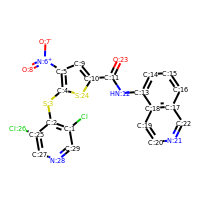
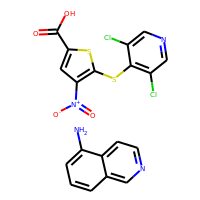
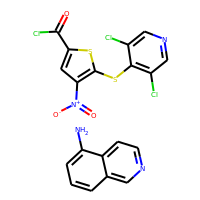
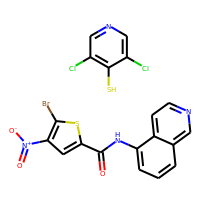
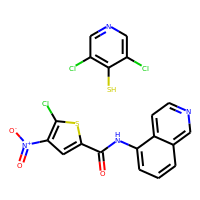
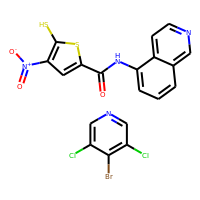
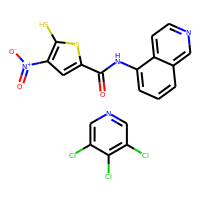
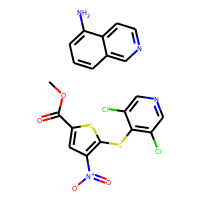
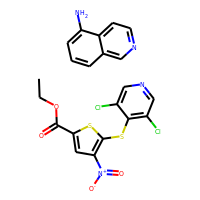
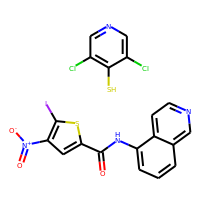
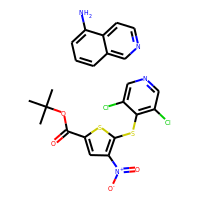

In [7]:
results